In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

business_data = pd.read_csv('business_d.csv')
user_data = pd.read_csv('user_d.csv')
time_series_data = pd.read_csv('time_series_d.csv')

2023-04-19 13:57:40.071163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 13:57:40.128868: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-19 13:57:40.451059: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/algoryc/miniconda3/lib/:/home/algoryc/miniconda3/envs/tf/lib/
2023-04-19 13:57:40.451096: W

In [2]:
business_data

,business_id,business_category,business_description,business_location_lat,business_location_lon,business_reviews,business_rating
0,1,Travel Agents &/Or Consultants,Business 1,32.499055,-108.449763,366,1.67
1,2,Printers' Supplies & Services,Business 2,31.758992,-104.190911,30,2.29
2,3,Supermarkets & Grocery Stores,Business 3,38.183602,-118.492383,693,3.03
3,4,Newsagents,Business 4,34.045891,-111.045724,24,4.89
4,5,Medical Centers,Business 5,34.508272,-76.468873,309,1.07
...,...,...,...,...,...,...,...
995,996,Ladies' Wear Retail,Business 996,36.850836,-88.170055,840,2.97
996,997,Travel Agents &/Or Consultants,Business 997,31.092339,-118.722212,693,3.64
997,998,Newsagents,Business 998,38.334722,-91.587451,224,4.96
998,999,Accountants & Auditors,Business 999,34.241995,-90.281880,100,2.73


In [ ]:
# business_data[business_data['business_suburb']== 'Suburb 55']

In [3]:
user_data

,user_id,user_location_lat,user_location_lon
0,1,32.791215,-118.331440
1,2,32.247614,-115.926481
2,3,31.630995,-100.553337
3,4,34.661419,-74.823948
4,5,31.572791,-111.992898
...,...,...,...
495,496,37.727801,-97.543513
496,497,31.504032,-75.540888
497,498,37.400469,-90.573262
498,499,30.196111,-82.750996


In [4]:
time_series_data

,time,user_id,business_id,suburb_name,user_behavior,business_performance,value
0,2022-01-01,1,571,Suburb 72,visited,rating,5
1,2022-01-01,2,889,Suburb 91,visited,visited,4
2,2022-01-01,3,406,Suburb 17,visited,sales,1
3,2022-01-01,4,140,Suburb 75,rated,sales,4
4,2022-01-01,5,888,Suburb 28,rated,rating,3
...,...,...,...,...,...,...,...
15495,2022-01-31,496,274,Suburb 60,rated,sales,5
15496,2022-01-31,497,607,Suburb 8,rated,visited,1
15497,2022-01-31,498,796,Suburb 33,rated,rating,2
15498,2022-01-31,499,309,Suburb 14,visited,sales,1


In [ ]:
# time_series_data[time_series_data['suburb_name']== 'Suburb 51']

In [ ]:
# Encode categorical data
le_business_category = LabelEncoder()
business_data['business_category_encoded'] = le_business_category.fit_transform(business_data['business_category'])
# le_user_id = LabelEncoder()
# user_data['user_id_encoded'] = le_user_id.fit_transform(user_data['user_id'])

In [5]:
# Merge the time-series data with the business and user data
time_series_data = pd.merge(time_series_data, business_data, on='business_id', how='left')

In [6]:
time_series_data = pd.merge(time_series_data, user_data, on='user_id', how='left')

In [7]:
mm = pd.read_csv('merged_time_series.csv')

In [ ]:
le_business_performance = LabelEncoder()
time_series_data['business_performance_encoded'] = le_business_performance.fit_transform(time_series_data['business_performance'])
le_user_behaviour = LabelEncoder()
time_series_data['user_behavior_encoded'] = le_user_behaviour.fit_transform(time_series_data['user_behavior'])

In [ ]:
suburb =pd.read_csv('Suburbs.csv')
len(suburb)


In [8]:
time_series_data

,time,user_id,business_id,suburb_name,user_behavior,business_performance,value,business_category,business_description,business_location_lat,business_location_lon,business_reviews,business_rating,user_location_lat,user_location_lon
0,2022-01-01,1,571,Suburb 72,visited,rating,5,Tourist Attractions Information &/Or Services,Business 571,33.220689,-75.160332,97,3.05,32.791215,-118.331440
1,2022-01-01,2,889,Suburb 91,visited,visited,4,Ladies' Wear Retail,Business 889,31.795331,-119.596507,176,1.53,32.247614,-115.926481
2,2022-01-01,3,406,Suburb 17,visited,sales,1,Gift Shops,Business 406,33.271704,-94.686480,441,2.27,31.630995,-100.553337
3,2022-01-01,4,140,Suburb 75,rated,sales,4,Multimedia Services,Business 140,39.226791,-89.975071,76,2.81,34.661419,-74.823948
4,2022-01-01,5,888,Suburb 28,rated,rating,3,Truck & Bus Rental,Business 888,32.169348,-118.314797,105,4.09,31.572791,-111.992898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,2022-01-31,496,274,Suburb 60,rated,sales,5,Newsagents,Business 274,35.129808,-80.821614,623,1.40,37.727801,-97.543513
15496,2022-01-31,497,607,Suburb 8,rated,visited,1,Ladies' Wear Retail,Business 607,35.153038,-97.362084,443,4.81,31.504032,-75.540888
15497,2022-01-31,498,796,Suburb 33,rated,rating,2,Marketing Services & Consultants,Business 796,31.956123,-79.051166,203,1.40,37.400469,-90.573262
15498,2022-01-31,499,309,Suburb 14,visited,sales,1,Ladies' Wear Retail,Business 309,35.276481,-104.030875,40,1.70,30.196111,-82.750996


In [9]:
mm

,time,user_id,business_id,user_behavior,business_performance,value,suburb_name
0,2022-01-01,1,593,visited,sales,4,Clayton
1,2022-01-01,2,56,rated,rating,2,Silvan
2,2022-01-01,3,392,visited,rating,4,Lysterfield South
3,2022-01-01,4,535,rated,visited,5,Gladstone Park
4,2022-01-01,5,944,rated,visited,2,Narre Warren
...,...,...,...,...,...,...,...
15495,2022-01-31,496,117,rated,sales,3,Seville
15496,2022-01-31,497,148,visited,visited,3,Lang Lang
15497,2022-01-31,498,330,visited,visited,2,Blackburn
15498,2022-01-31,499,675,rated,sales,2,Warneet


In [11]:
len(mm['business_id'].unique())

1000

In [12]:
mm = mm.drop(columns=['time','business_id',
                    'user_behavior','business_performance',
                   'value'])

In [13]:
mm

,user_id,suburb_name
0,1,Clayton
1,2,Silvan
2,3,Lysterfield South
3,4,Gladstone Park
4,5,Narre Warren
...,...,...
15495,496,Seville
15496,497,Lang Lang
15497,498,Blackburn
15498,499,Warneet


In [14]:
time_series_data

,time,user_id,business_id,suburb_name,user_behavior,business_performance,value,business_category,business_description,business_location_lat,business_location_lon,business_reviews,business_rating,user_location_lat,user_location_lon
0,2022-01-01,1,571,Suburb 72,visited,rating,5,Tourist Attractions Information &/Or Services,Business 571,33.220689,-75.160332,97,3.05,32.791215,-118.331440
1,2022-01-01,2,889,Suburb 91,visited,visited,4,Ladies' Wear Retail,Business 889,31.795331,-119.596507,176,1.53,32.247614,-115.926481
2,2022-01-01,3,406,Suburb 17,visited,sales,1,Gift Shops,Business 406,33.271704,-94.686480,441,2.27,31.630995,-100.553337
3,2022-01-01,4,140,Suburb 75,rated,sales,4,Multimedia Services,Business 140,39.226791,-89.975071,76,2.81,34.661419,-74.823948
4,2022-01-01,5,888,Suburb 28,rated,rating,3,Truck & Bus Rental,Business 888,32.169348,-118.314797,105,4.09,31.572791,-111.992898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,2022-01-31,496,274,Suburb 60,rated,sales,5,Newsagents,Business 274,35.129808,-80.821614,623,1.40,37.727801,-97.543513
15496,2022-01-31,497,607,Suburb 8,rated,visited,1,Ladies' Wear Retail,Business 607,35.153038,-97.362084,443,4.81,31.504032,-75.540888
15497,2022-01-31,498,796,Suburb 33,rated,rating,2,Marketing Services & Consultants,Business 796,31.956123,-79.051166,203,1.40,37.400469,-90.573262
15498,2022-01-31,499,309,Suburb 14,visited,sales,1,Ladies' Wear Retail,Business 309,35.276481,-104.030875,40,1.70,30.196111,-82.750996


In [16]:
data = pd.merge(time_series_data, mm, on='user_id', how='left')

In [17]:
data

,time,user_id,business_id,suburb_name_x,user_behavior,business_performance,value,business_category,business_description,business_location_lat,business_location_lon,business_reviews,business_rating,user_location_lat,user_location_lon,suburb_name_y
0,2022-01-01,1,571,Suburb 72,visited,rating,5,Tourist Attractions Information &/Or Services,Business 571,33.220689,-75.160332,97,3.05,32.791215,-118.331440,Clayton
1,2022-01-01,1,571,Suburb 72,visited,rating,5,Tourist Attractions Information &/Or Services,Business 571,33.220689,-75.160332,97,3.05,32.791215,-118.331440,Thornhill Park
2,2022-01-01,1,571,Suburb 72,visited,rating,5,Tourist Attractions Information &/Or Services,Business 571,33.220689,-75.160332,97,3.05,32.791215,-118.331440,Belgrave Heights
3,2022-01-01,1,571,Suburb 72,visited,rating,5,Tourist Attractions Information &/Or Services,Business 571,33.220689,-75.160332,97,3.05,32.791215,-118.331440,Mount Waverley
4,2022-01-01,1,571,Suburb 72,visited,rating,5,Tourist Attractions Information &/Or Services,Business 571,33.220689,-75.160332,97,3.05,32.791215,-118.331440,Hawthorn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480495,2022-01-31,500,411,Suburb 40,visited,visited,2,Gift Shops,Business 411,33.875044,-111.386531,381,2.96,36.277615,-106.643232,Arthurs Seat
480496,2022-01-31,500,411,Suburb 40,visited,visited,2,Gift Shops,Business 411,33.875044,-111.386531,381,2.96,36.277615,-106.643232,Heatherton
480497,2022-01-31,500,411,Suburb 40,visited,visited,2,Gift Shops,Business 411,33.875044,-111.386531,381,2.96,36.277615,-106.643232,Catani
480498,2022-01-31,500,411,Suburb 40,visited,visited,2,Gift Shops,Business 411,33.875044,-111.386531,381,2.96,36.277615,-106.643232,Mambourin


In [18]:
data = data.drop(columns=['suburb_name_x','time','user_id','business_id',
                          'business_description',
                           'business_location_lat','business_location_lon',
                          'user_location_lat','user_location_lon'])

In [19]:
data

,user_behavior,business_performance,value,business_category,business_reviews,business_rating,suburb_name_y
0,visited,rating,5,Tourist Attractions Information &/Or Services,97,3.05,Clayton
1,visited,rating,5,Tourist Attractions Information &/Or Services,97,3.05,Thornhill Park
2,visited,rating,5,Tourist Attractions Information &/Or Services,97,3.05,Belgrave Heights
3,visited,rating,5,Tourist Attractions Information &/Or Services,97,3.05,Mount Waverley
4,visited,rating,5,Tourist Attractions Information &/Or Services,97,3.05,Hawthorn
...,...,...,...,...,...,...,...
480495,visited,visited,2,Gift Shops,381,2.96,Arthurs Seat
480496,visited,visited,2,Gift Shops,381,2.96,Heatherton
480497,visited,visited,2,Gift Shops,381,2.96,Catani
480498,visited,visited,2,Gift Shops,381,2.96,Mambourin


In [21]:
print(data['user_behavior'].unique())

['visited' 'rated']


In [23]:
data.replace({'rated': 0, 'visited': 1}, inplace= True)

In [25]:
print(data['business_performance'].unique())

['rating' 1 'sales']


In [27]:
data.replace({'rating': 0, 'sales': 0.5}, inplace =True)


In [29]:
print(data['business_performance'].unique())

[0.  1.  0.5]


In [31]:
data['business_category_encoded'] = pd.factorize(data.business_category)[0]
data['suburb_name_encoded'] = pd.factorize(data.suburb_name_y)[0]

In [32]:
data

,user_behavior,business_performance,value,business_category,business_reviews,business_rating,suburb_name_y,business_category_encoded,suburb_name_encoded
0,1,0.0,5,Tourist Attractions Information &/Or Services,97,3.05,Clayton,0,0
1,1,0.0,5,Tourist Attractions Information &/Or Services,97,3.05,Thornhill Park,0,1
2,1,0.0,5,Tourist Attractions Information &/Or Services,97,3.05,Belgrave Heights,0,2
3,1,0.0,5,Tourist Attractions Information &/Or Services,97,3.05,Mount Waverley,0,3
4,1,0.0,5,Tourist Attractions Information &/Or Services,97,3.05,Hawthorn,0,4
...,...,...,...,...,...,...,...,...,...
480495,1,1.0,2,Gift Shops,381,2.96,Arthurs Seat,2,326
480496,1,1.0,2,Gift Shops,381,2.96,Heatherton,2,186
480497,1,1.0,2,Gift Shops,381,2.96,Catani,2,307
480498,1,1.0,2,Gift Shops,381,2.96,Mambourin,2,311


In [35]:
data1 = data.drop(columns=['business_category','suburb_name_y'])

In [36]:
data1

,user_behavior,business_performance,value,business_reviews,business_rating,business_category_encoded,suburb_name_encoded
0,1,0.0,5,97,3.05,0,0
1,1,0.0,5,97,3.05,0,1
2,1,0.0,5,97,3.05,0,2
3,1,0.0,5,97,3.05,0,3
4,1,0.0,5,97,3.05,0,4
...,...,...,...,...,...,...,...
480495,1,1.0,2,381,2.96,2,326
480496,1,1.0,2,381,2.96,2,186
480497,1,1.0,2,381,2.96,2,307
480498,1,1.0,2,381,2.96,2,311


In [38]:
print(data1['user_behavior'].unique())
print(data1['business_performance'].unique())

[1 0]
[0.  1.  0.5]


In [39]:
scaling_columns = ['value','business_reviews','business_rating','suburb_name_encoded']
scale_factor = MinMaxScaler()
data1[scaling_columns] = scale_factor.fit_transform(data1[scaling_columns])

In [40]:
data1

,user_behavior,business_performance,value,business_reviews,business_rating,business_category_encoded,suburb_name_encoded
0,1,0.0,1.00,0.097,0.513784,0,0.000000
1,1,0.0,1.00,0.097,0.513784,0,0.001919
2,1,0.0,1.00,0.097,0.513784,0,0.003839
3,1,0.0,1.00,0.097,0.513784,0,0.005758
4,1,0.0,1.00,0.097,0.513784,0,0.007678
...,...,...,...,...,...,...,...
480495,1,1.0,0.25,0.381,0.491228,2,0.625720
480496,1,1.0,0.25,0.381,0.491228,2,0.357006
480497,1,1.0,0.25,0.381,0.491228,2,0.589251
480498,1,1.0,0.25,0.381,0.491228,2,0.596929


In [42]:
x = data1.drop(columns=['business_category_encoded'])
y = data1['business_category_encoded']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [44]:
x1 = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1 )
y1 = y_train.values.reshape(-1,1)

In [45]:
print(x_train.shape)
print(y_train.shape)

(384400, 6)
(384400,)


In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape = (6, 1), return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(64, return_sequences =True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(32, return_sequences =False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(416, activation ='relu'),
    tf.keras.layers.Dense(104, activation ='relu'),
    tf.keras.layers.Dense(52, activation ='softmax')
    ])

2023-04-19 14:18:49.451876: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-19 14:18:49.454474: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-19 14:18:49.454559: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-19 14:18:49.454765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

In [47]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer = optim,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [49]:
history = model.fit(x1, y1, 
                    validation_split=0.15,
                    batch_size=2048,
                    epochs=350,
                    verbose=1)

Epoch 1/350
160/160 [==============================] - 5s 32ms/step - loss: 1.6566 - accuracy: 0.4107 - val_loss: 1.1661 - val_accuracy: 0.6455
Epoch 2/350
160/160 [==============================] - 5s 34ms/step - loss: 1.5840 - accuracy: 0.4298 - val_loss: 1.1179 - val_accuracy: 0.6460
Epoch 3/350
160/160 [==============================] - 5s 33ms/step - loss: 1.5473 - accuracy: 0.4393 - val_loss: 1.0220 - val_accuracy: 0.6958
Epoch 4/350
160/160 [==============================] - 6s 35ms/step - loss: 1.5105 - accuracy: 0.4500 - val_loss: 0.9589 - val_accuracy: 0.7190
Epoch 5/350
160/160 [==============================] - 6s 35ms/step - loss: 1.4816 - accuracy: 0.4560 - val_loss: 0.9100 - val_accuracy: 0.7400
Epoch 6/350
160/160 [==============================] - 6s 35ms/step - loss: 1.4496 - accuracy: 0.4663 - val_loss: 0.8774 - val_accuracy: 0.7514
Epoch 7/350
160/160 [==============================] - 6s 35ms/step - loss: 1.4219 - accuracy: 0.4748 - val_loss: 0.9576 - val_accuracy:

In [ ]:
#df = time_series_data.groupby(["user_id"]).apply(lambda x: x.sort_values(["time"], ascending = True)).reset_index(drop=True)
df1 = time_series_data.drop(columns=['business_location_lat','business_description',
                                     'business_location_lon','user_location_lat','user_location_lon'])
df1.replace({'rated': 0, 'visited': 1}, inplace= True)
df1.replace({'rating': 0, 'sales': 0.5, 'visited': 1}, inplace =True)

df1['business_category_encoded']=pd.factorize(df1.business_category)[0]
df1 = df1.drop(columns=['business_category'], axis=1)

df2 = pd.merge(df1, mm, on='user_id', how='left')

df3 = df2.drop(columns=['time_y','business_id_y','user_behavior_y',
                      'business_performance_y','value_y'], axis=1)
df3['suburb_name_encoded'] = pd.factorize(df3.suburb_name)[0]
df4 = df3.drop(columns=['suburb_name','time_x','business_id_x','user_id'])

scale_columns = ['value_x','business_reviews','suburb_name_encoded',
                 'business_rating','business_category_encoded',
                'business_performance_encoded']
scaler = MinMaxScaler()
df4[scale_columns] = scaler.fit_transform(df4[scale_columns])

x = df4.drop(columns=['business_category_encoded'])
y = df4['business_category_encoded']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


output_shape = len(df4['business_category_encoded'].unique())
print(output_shape)



In [ ]:
x = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1 )
y = y_train.values.reshape(-1,1)

print(x_train.shape)
print(y_train.shape)

df4

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape = (8, 1), return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(64, return_sequences =True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(32, return_sequences =False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(416, activation ='relu'),
    tf.keras.layers.Dense(104, activation ='relu'),
    tf.keras.layers.Dense(52, activation ='softmax')
    ])

optim = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer = optim,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(x, y, 
                    #callbacks=checkpointing,
                    validation_split=0.15,
                    batch_size=128,
                    epochs=350,
                    verbose=1)

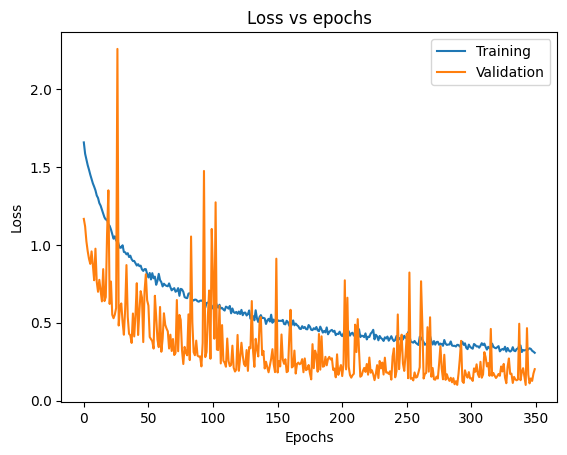

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')

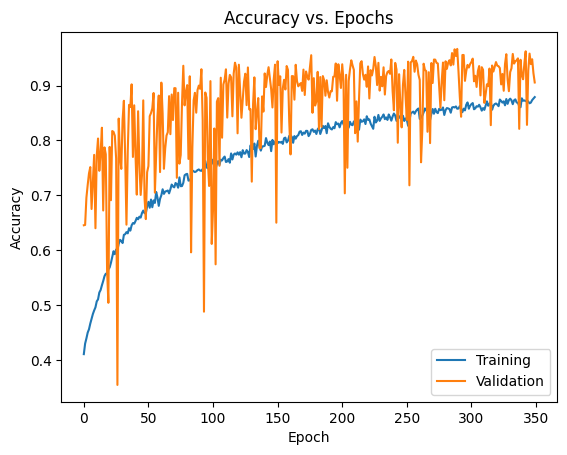

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [55]:
x2 = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1 )
y2 = y_test.values.reshape(-1,1)

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(x2)
predicted = np.argmax(pred, axis=1).reshape(-1,1)

matrix = confusion_matrix(y2, predicted)

3004/3004 [==============================] - 17s 6ms/step


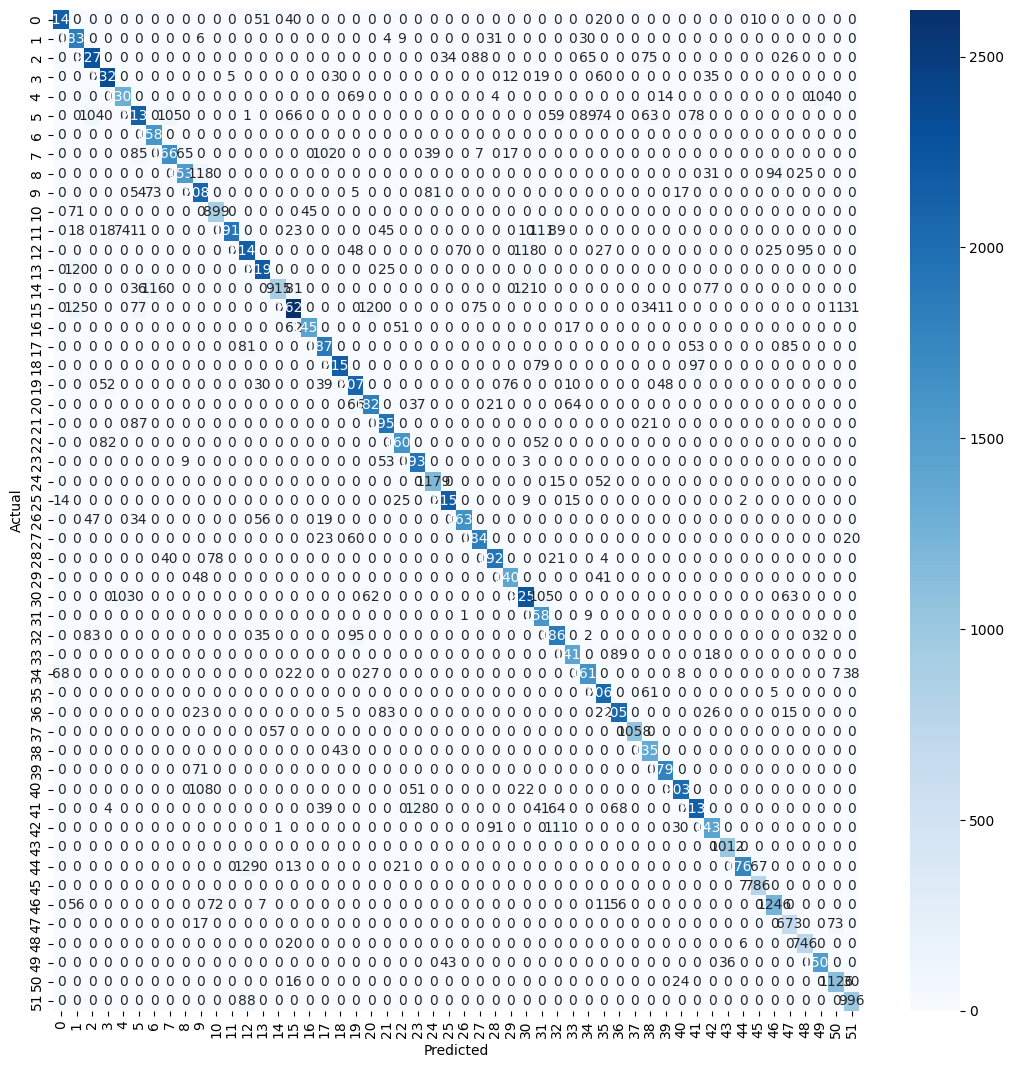

In [64]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(13,13))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
path = '/home/algoryc/Projects/Untitled Folder/weights/saving weights'

checkpointing = ModelCheckpoint(filepath=path,
                                save_weights_only=True,
                                save_freq='epoch',
                                monitor='accuracy',
                                save_best_only=True,
                                mode='max',
                                verbose=1)


In [ ]:
yy.shape

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(13,13))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report 
classification_report(yy, predicted)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs=')
plt.legend(['Training', 'Validation'], loc='upper right')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [ ]:
# Split data into input and output sequences
X, y = [], []
seq_len = 30
for i in range(len(data) - seq_len):
# for i in range(0, len(data) - seq_len, seq_len-1):
    X.append(data[i:i+seq_len, :-1])
    y.append(data[i+seq_len-1, -1:])

X = np.array(X)
y = np.array(y)

# Print shapes of input and output arrays
print('Input shape:', X.shape)
print('Output shape:', y.shape)

In [ ]:
import numpy as np

# Load preprocessed data and split into X and y
# X = np.load('preprocessed_data_X.npy')
# y = np.load('preprocessed_data_y.npy')

# Split into training, validation and test sets
train_size = int(0.7 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size

train_X, val_X, test_X = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
train_y, val_y, test_y = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

print("Training data shape:", train_X.shape, train_y.shape)
print("Validation data shape:", val_X.shape, val_y.shape)
print("Test data shape:", test_X.shape, test_y.shape)

In [ ]:
## Define the LSTM model
classes = len(df['business_category_encoded'].unique())
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(classes))

In [ ]:
import keras
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from time import time

opt = tf.keras.optimizers.Adam(
    learning_rate=0.0001)

# model.compile(loss='mse', optimizer='adam')
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#callbacks = [EarlyStopping(monitor='val_loss', patience=2),
#             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
#callbacks=callbacks, 

callbacks = [EarlyStopping(monitor='val_loss', patience=15),
            ModelCheckpoint(filepath='relational_model_class.h5', monitor='val_loss', save_best_only=True)]

start = time()
# fit network
history = model.fit(train_X, train_y, epochs=100, validation_data=(val_X, val_y), verbose=1, shuffle=False, 
                    batch_size=128, callbacks=callbacks)

# Early Stopping
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

print('training time = ',time()-start)


In [ ]:
# Create a pivot table of the time-series data
pivot_data = pd.pivot_table(time_series_data, values='value', index=['suburb_id_encoded', 'user_id_encoded', 'business_id', 'business_category_encoded'], columns=['user_behavior', 'business_performance'])

# Fill missing values with 0
pivot_data.fillna(0, inplace=True)

# Reshape the data for LSTM input
X = pivot_data.values.reshape(pivot_data.shape[0], pivot_data.shape[1], 1)
y = pivot_data.values[:, 2]

In [ ]:
# pivot_data.iloc[:, 0]

In [ ]:
pivot_data.iloc[:, 2].values

In [ ]:
pivot_data

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:].values
X = X.values.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape

In [ ]:
## Define the LSTM model
# model = Sequential()
# model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2])))
# model.add(Dense(1))

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.MaxPooling1D(pool_size=2, strides=None, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.MaxPooling1D(pool_size=2, strides=None, padding="valid"),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.summary()

In [ ]:
model.summary()

In [ ]:
import keras
keras.utils.plot_model(model, dpi=60)

In [ ]:
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from time import time

opt = keras.optimizers.SGD(
    learning_rate=0.01) 

callbacks = [EarlyStopping(monitor='val_loss', patience=10),
            ModelCheckpoint(filepath='model_comp_52cat_mse.h5', monitor='val_loss', save_best_only=True)]



# Compile the model
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

# Train the model
start = time()
history = model.fit(X_train, y_train, epochs=200, batch_size=128, verbose=1, validation_data=(X_val, y_val), callbacks=callbacks)
print('training time = ',time()-start)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()


In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the validation set
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss[0]:.4f}')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('model_comp_52cat_mse.h5')

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_loss = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Test R^2: {test_r2:.4f}')

In [ ]:
np.unique(y_test)

In [ ]:
X_test.shape

In [ ]:
# Choose a random user from the test set
user_index = np.random.choice(X_test.shape[0])

# Get the input data for the chosen user
X_user = X_test[user_index].reshape(1, X.shape[1], X.shape[2])

# Make predictions for the chosen user
y_user_pred = model.predict(X_user)

# Decode the predicted business category for the chosen user
user_business_cat = np.argmax(y_user_pred, axis=1)[0]
user_business_cat_decoded = le_business_category.inverse_transform([user_business_cat])[0]

# Print the decoded business category for the chosen user
print(f"Recommended business category for user '{le_user_id.inverse_transform([user_index])[0]}' in the test set: '{user_business_cat_decoded}'")


In [ ]:
user_business_cat_decoded

In [ ]:
y_user_pred

In [ ]:
X_user.shape

In [ ]:
X_test.shape

In [ ]:
user_index

In [ ]:
X.shape

In [ ]:
business_ids = business_data['business_id'].unique()
len(business_ids)

In [ ]:
suburb_id = 78

In [ ]:
X_suburb = pivot_data.loc[(suburb_id, business_ids), :]
X_suburb

In [ ]:
# Make predictions for the chosen user
y_user_pred = model.predict(X_suburb)

# Decode the predicted business category for the chosen user
user_business_cat = np.argmax(y_user_pred, axis=1)[0]
user_business_cat_decoded = le_business_category.inverse_transform([user_business_cat])[0]

# Print the decoded business category for the chosen user
print(f"Recommended business category for Suburb '{le_suburb_id.inverse_transform([suburb_id])[0]}' in the test set: '{user_business_cat_decoded}'")
